In [1]:
import numpy as np     # scientific calculation
import pandas as pd    # handle csv file
import seaborn as sns  # visualize 
import matplotlib.pyplot as plt # plotting

In [2]:
df= pd.read_csv('OnlineRetail.csv',encoding= 'unicode_escape')

C:\Users\USER\Anaconda3\envs\tf2-py37\lib\site-packages\IPython\core\interactiveshell.py:3418: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Buying_time,UnitPrice,CustomerID,Country
0,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011/12/9,09:27,2.08,16446.0,United Kingdom
1,556690,23005,printing smudges/thrown away,-9600,2011/6/14,10:37,0.00,NaN,United Kingdom
2,556691,23005,printing smudges/thrown away,-9600,2011/6/14,10:37,0.00,NaN,United Kingdom
3,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010/12/2,14:23,0.03,15838.0,United Kingdom
4,556687,23003,Printing smudges/thrown away,-9058,2011/6/14,10:36,0.00,NaN,United Kingdom
...,...,...,...,...,...,...,...,...,...
541902,554868,22197,SMALL POPCORN HOLDER,4300,2011/5/27,10:52,0.72,13135.0,United Kingdom
541903,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011/10/27,12:26,0.21,12901.0,United Kingdom
541904,542504,37413,NaN,5568,2011/1/28,12:03,0.00,NaN,United Kingdom
541905,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011/11/25,15:57,0.00,13256.0,United Kingdom


In [4]:
df=df.sort_values(by=['InvoiceNo','InvoiceDate'], axis=0, ascending=True, inplace=False,ignore_index=True)

In [5]:
df.dropna(axis=0, inplace=True)

In [6]:
df['monetary']=df.apply(lambda x: x['UnitPrice']*x['Quantity'], axis=1)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Buying_time,UnitPrice,CustomerID,Country,monetary
0,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010/12/1,08:26,7.65,17850.0,United Kingdom,15.30
1,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010/12/1,08:26,2.55,17850.0,United Kingdom,15.30
2,536365,71053,WHITE METAL LANTERN,6,2010/12/1,08:26,3.39,17850.0,United Kingdom,20.34
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010/12/1,08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010/12/1,08:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...,...
541902,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011/12/9,09:57,0.83,14397.0,United Kingdom,-9.13
541903,C581499,M,Manual,-1,2011/12/9,10:28,224.69,15498.0,United Kingdom,-224.69
541904,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011/12/9,11:57,10.95,15311.0,United Kingdom,-54.75
541905,C581569,20979,36 PENCILS TUBE RED RETROSPOT,-5,2011/12/9,11:58,1.25,17315.0,United Kingdom,-6.25


In [7]:
df2 = df.groupby('InvoiceDate')['monetary'].sum()
df2 = df2.to_frame()
df2

,monetary
InvoiceDate,
2010/12/1,46051.26
2010/12/10,32005.35
2010/12/12,17217.62
2010/12/13,27429.43
2010/12/14,26913.41
...,...
2011/9/5,35385.60
2011/9/6,25198.53
2011/9/7,21679.54


Text(0, 0.5, 'Revenue')

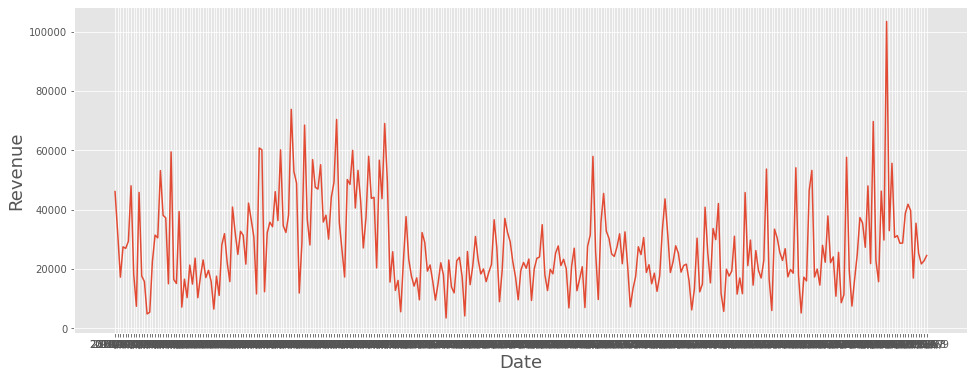

In [8]:
import matplotlib.dates as mdate
plt.style.use('ggplot')
plt.figure(figsize=(16,6))
plt.plot(df2)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Revenue', fontsize=18)

C:\Users\USER\Anaconda3\envs\tf2-py37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


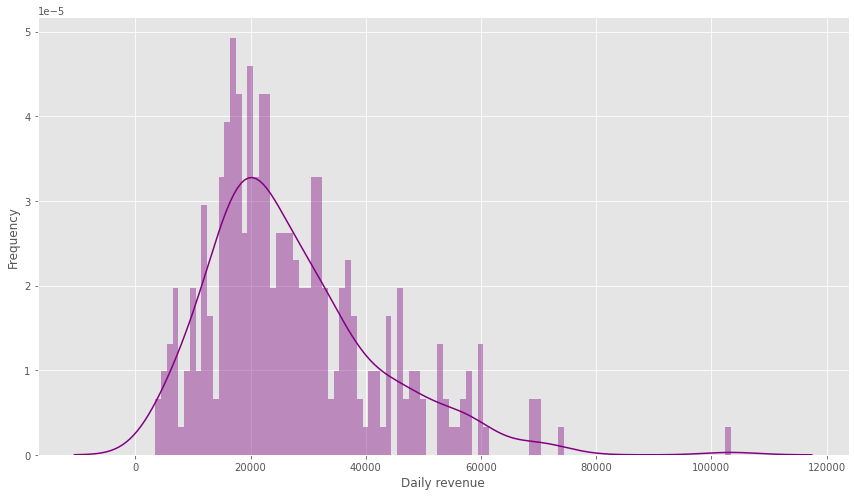

In [9]:
plt.figure(figsize=(12, 7))
name = ['revenue']
plt.subplot(1, 1, 1)
sns.distplot(df2['monetary'].dropna(), bins=100, color='purple')
plt.xlabel('Daily revenue')
plt.ylabel('Frequency')
plt.tight_layout()

In [10]:
#https://min.news/zh-tw/tech/a98f1a88177d64e2d0277e386c3630bc.html

In [11]:
# 創建一個只有收盤價的新數據幀
data = df2
# 將數據幀轉換為numpy數組
dataset = data.values
# 獲取要對模型進行訓練的行數
training_data_len = int(np.ceil( len(dataset) * .95 ))
# 數據標準化
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
# 創建訓練集，訓練標準化訓練集
train_data = scaled_data[0:int(training_data_len), :]
# 將數據拆分為x_train和y_train數據集
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)     
# 將x_train和y_train轉換為numpy數組 
x_train, y_train = np.array(x_train), np.array(y_train)
# Reshape數據
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.42624776, 0.28568767, 0.13770404, 0.23989556, 0.23473165,
       0.25872269, 0.44586455, 0.14715883, 0.03945515, 0.42348748,
       0.14127621, 0.12302189, 0.01364991, 0.01928446, 0.19155113,
       0.27943567, 0.27027389, 0.49704593, 0.34616442, 0.33744986,
       0.11535578, 0.56013456, 0.12983909, 0.11631457, 0.35901065,
       0.03662131, 0.13072613, 0.06870386, 0.17853738, 0.11423097,
       0.20175286, 0.0683375 , 0.14007154, 0.19570301, 0.13614522,
       0.16072768, 0.12318351, 0.03001487, 0.14095388, 0.07598209,
       0.24711045, 0.28426775, 0.18750702, 0.12262501, 0.3741094 ,
       0.2876838 , 0.2143323 , 0.29224057, 0.27879361, 0.18161379,
       0.38731028, 0.33174806, 0.27326114, 0.08120725, 0.57318373,
       0.56735534, 0.0885166 , 0.28733405, 0.32294894, 0.30782978])]
[0.42599067429948423]
[array([0.42624776, 0.28568767, 0.13770404, 0.23989556, 0.23473165,
       0.25872269, 0.44586455, 0.14715883, 0.03945515, 0.42348748,
       0.14127621, 0.12302189, 0.013

In [12]:
# pip install keras
from keras.models import Sequential
from keras.layers import Dense, LSTM
# 建立LSTM模型
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
# 編譯模型
model.compile(optimizer='adam', loss='mean_squared_error')
# 訓練模型
model.fit(x_train, y_train, batch_size=1, epochs=1)

230/230 [==============================] - 15s 39ms/step - loss: 0.0210


In [13]:
# 創建測試數據集
# 創建一個新的數組，包含從索引的縮放值
test_data = scaled_data[training_data_len - 60: , :]
# 創建數據集x_test和y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])    
# 將數據轉換為numpy數組
x_test = np.array(x_test)
# 重塑的數據
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
# 得到模型的預測值 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
# 得到均方根誤差(RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))

C:\Users\USER\Anaconda3\envs\tf2-py37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


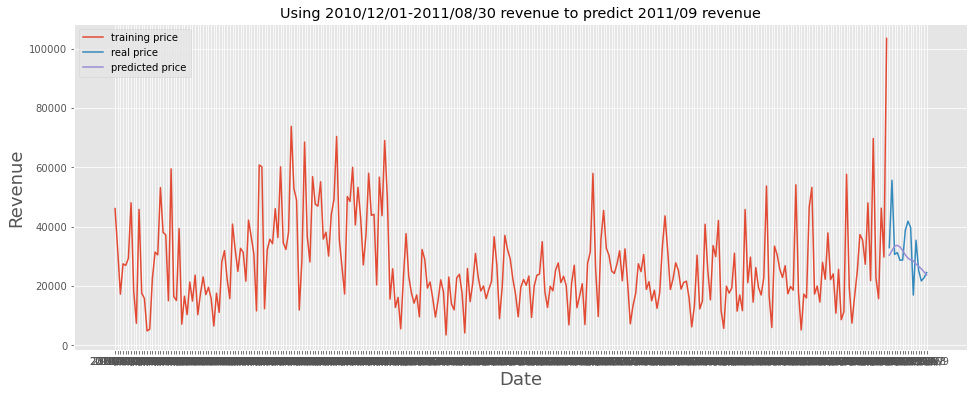

In [33]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,6))
plt.title('Using 2010/12/01-2011/08/30 revenue to predict 2011/09 revenue')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Revenue', fontsize=18)
plt.plot(train['monetary'])
plt.plot(valid[['monetary', 'Predictions']])
plt.legend(['training price', 'real price', 'predicted price'], loc='upper left')
plt.show()